<h1>Feature Engineering and Extration</h1>

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


<h3>Loading the Data</h3>

In [2]:
# Loading the dataset into the notebook
data = pd.read_csv('../data/articles_clean.csv')
data.head()

,Unnamed: 0,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,title_sentiment_polarity,shares,published_date_cleaned,data_channel_cleaned,business,entertainment,lifestyle,misc,social media,tech
0,0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,...,0.25,1600,2014-03-31,business,1,0,0,0,0,0
1,1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4,1,0,4.636704,7,...,0.00,1500,2014-04-01,tech,0,0,0,0,0,1
2,2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8,1,0,4.627451,7,...,0.00,1400,2014-04-01,tech,0,0,0,0,0,1
3,3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4,1,0,5.083665,9,...,0.00,1300,2014-04-01,tech,0,0,0,0,0,1
4,4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6,9,0,4.336022,7,...,0.00,3000,2014-04-01,misc,0,0,0,1,0,0


In [3]:
df = data

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

<h3>Treating Outliers</h3>

In [5]:
# making a list of all numeric columns in the dataset
num_columns = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key', 'avg_avg_key', 'href_avg_shares', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'title_subjectivity', 'shares']

In [6]:
# Removing outliers by deleting all data outside the first 95% of the data
def remove_outliers(df, col):
    lower = df[col].min()
    higher = df[col].quantile(.95)
    df[col] = df[col].clip(lower=lower, upper=higher)
    return df[col]

print(df.describe())

for i in num_columns:
    remove_outliers(df, i)

df.describe()



         article_id  unique_tokens_rate    num_hrefs     num_imgs  \
count  1.003000e+03         1003.000000  1003.000000  1003.000000   
mean   6.915159e+06            0.526890    11.720837     5.188435   
std    4.823885e+05            0.118793    15.181597     8.495002   
min    2.195051e+06            0.000000     0.000000     0.000000   
25%    7.006102e+06            0.466751     4.000000     1.000000   
50%    7.013065e+06            0.533118     8.000000     2.000000   
75%    7.027570e+06            0.596615    14.000000     7.000000   
max    7.041291e+06            0.867925   162.000000    84.000000   

        num_videos  average_token_length  num_keywords  min_avg_key  \
count  1003.000000           1003.000000   1003.000000  1003.000000   
mean      1.215354              4.603757      7.206381  1131.437972   
std       4.079730              0.701756      1.856713  1181.134621   
min       0.000000              0.000000      2.000000     0.000000   
25%       0.000000     

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,...,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,business,entertainment,lifestyle,misc,social media,tech
count,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,...,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,6.915159e+06,0.524354,10.395813,4.580259,0.634098,4.592637,7.206381,1121.769655,5546.328503,3253.750034,...,0.017285,0.292537,0.057536,2801.232303,0.163509,0.184447,0.050847,0.348953,0.054835,0.197408
std,4.823885e+05,0.114301,8.264578,5.885661,1.052852,0.687086,1.856713,1162.286160,2351.984209,1039.975808,...,0.009043,0.325227,0.266609,2956.119061,0.370014,0.388042,0.219796,0.476877,0.227772,0.398241
min,2.195051e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,...,0.000000,0.000000,-1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.006102e+06,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,...,0.011224,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.013065e+06,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,...,0.016266,0.200000,0.000000,1600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.027570e+06,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,...,0.022597,0.500000,0.150000,3100.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,7.041291e+06,0.687783,33.000000,21.000000,4.000000,5.125162,10.000000,3264.605000,11800.000000,5638.779700,...,0.036680,1.000000,1.000000,12290.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'unique_tokens_rate'}>,
        <AxesSubplot:title={'center':'num_hrefs'}>,
        <AxesSubplot:title={'center':'num_imgs'}>,
        <AxesSubplot:title={'center':'num_videos'}>],
       [<AxesSubplot:title={'center':'average_token_length'}>,
        <AxesSubplot:title={'center':'num_keywords'}>,
        <AxesSubplot:title={'center':'min_avg_key'}>,
        <AxesSubplot:title={'center':'max_avg_key'}>],
       [<AxesSubplot:title={'center':'avg_avg_key'}>,
        <AxesSubplot:title={'center':'href_avg_shares'}>,
        <AxesSubplot:title={'center':'global_subjectivity'}>,
        <AxesSubplot:title={'center':'global_sentiment_polarity'}>],
       [<AxesSubplot:title={'center':'global_rate_positive_words'}>,
        <AxesSubplot:title={'center':'global_rate_negative_words'}>,
        <AxesSubplot:title={'center':'title_subjectivity'}>,
        <AxesSubplot:>]], dtype=object)

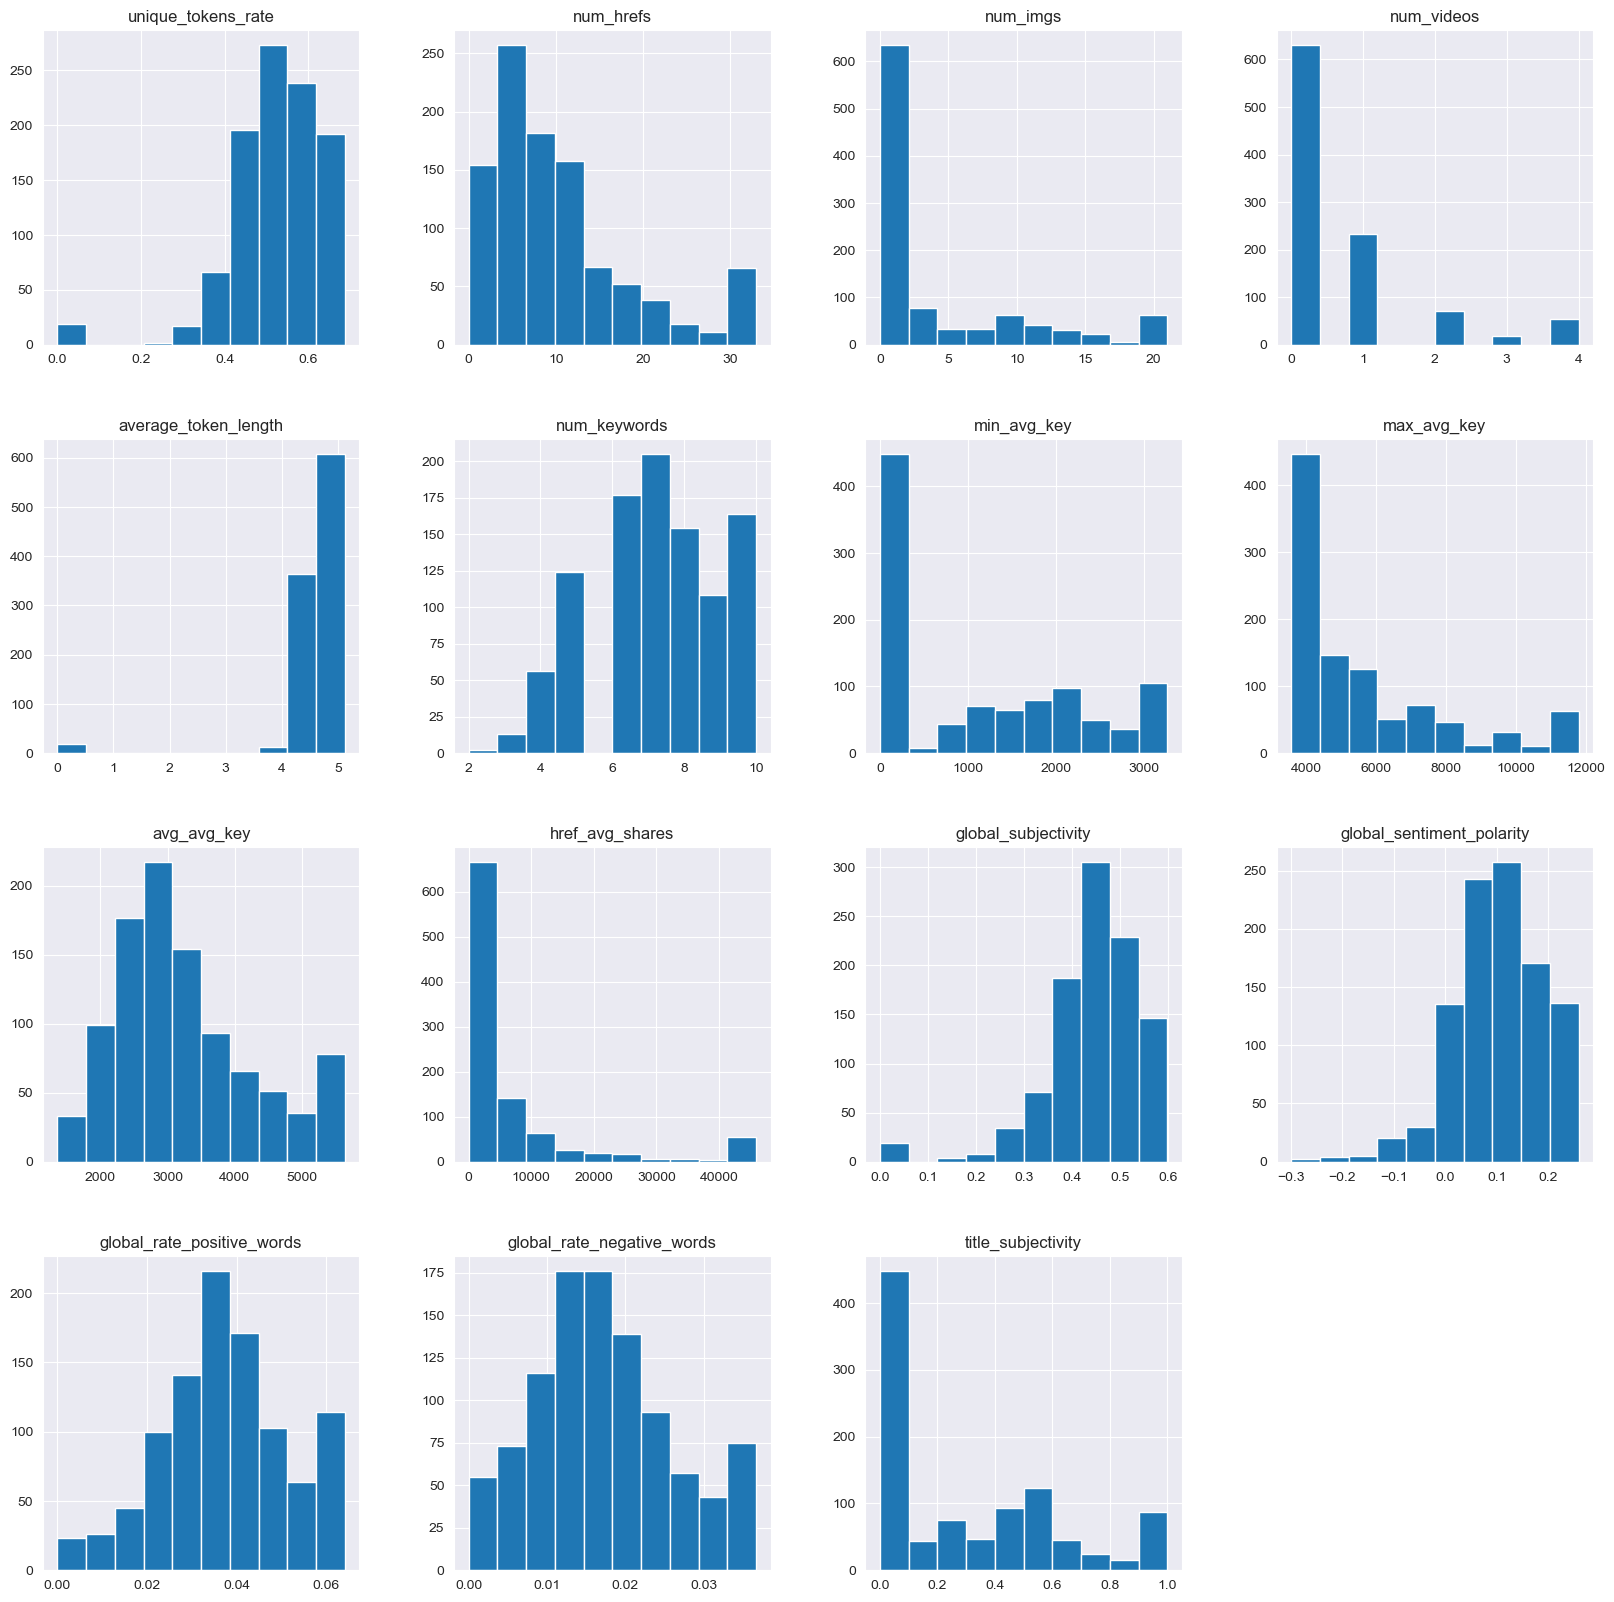

In [7]:
# Making a histogram of all numeric columns in the dataset
fields = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key', 'avg_avg_key', 'href_avg_shares', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'title_subjectivity']
df.hist(fields, figsize=(20,20))

<AxesSubplot:>

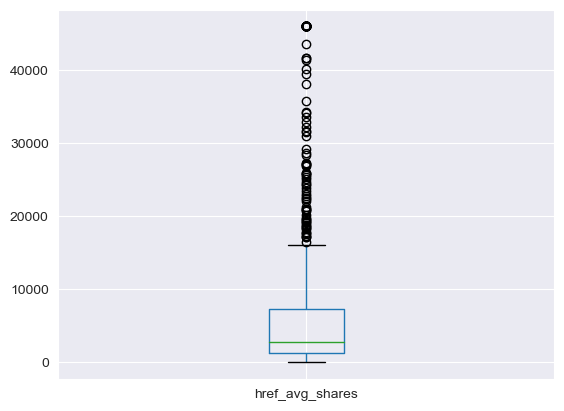

In [8]:
df[['href_avg_shares']].boxplot()

<AxesSubplot:>

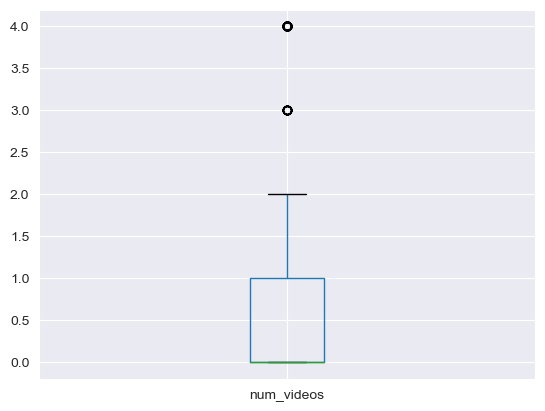

In [9]:
df[['num_videos']].boxplot()

<AxesSubplot:>

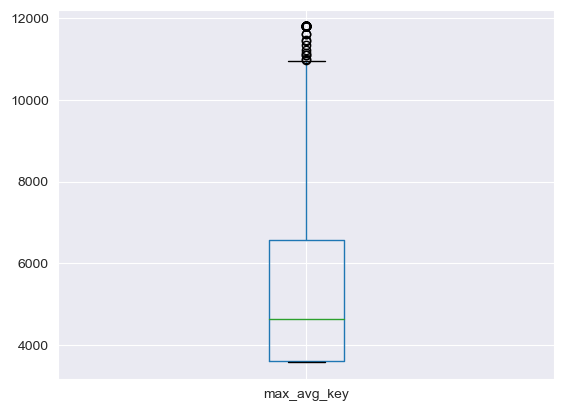

In [10]:
df[['max_avg_key']].boxplot()

<AxesSubplot:>

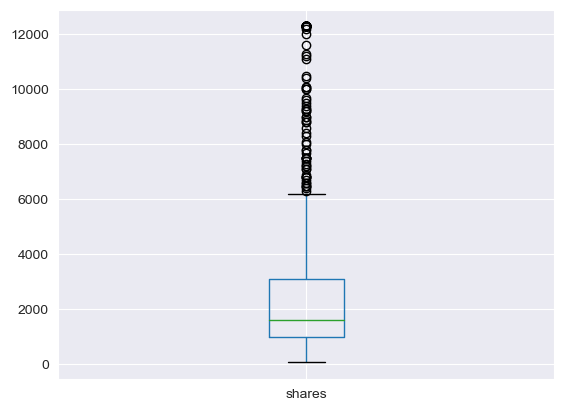

In [11]:
df[['shares']].boxplot()

<h3>Feature Engineering</h3>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   article_id                  1003 non-null   int64  
 1   title                       1003 non-null   object 
 2   text                        1003 non-null   object 
 3   unique_tokens_rate          1003 non-null   float64
 4   num_hrefs                   1003 non-null   float64
 5   num_imgs                    1003 non-null   float64
 6   num_videos                  1003 non-null   float64
 7   average_token_length        1003 non-null   float64
 8   num_keywords                1003 non-null   int64  
 9   min_avg_key                 1003 non-null   float64
 10  max_avg_key                 1003 non-null   float64
 11  avg_avg_key                 1003 non-null   float64
 12  href_avg_shares             1003 non-null   float64
 13  global_subjectivity         1003 

In [13]:
# Creating a function for determining whether the publishing date is a weekday or weekend
def is_weekday(date):
    if date in [5,6]:
        return 0;
    elif date in [0,1,2,3,4]:
        return 1;
    else:
        return 'Error'


In [14]:
# Adding Feature for whether the publication date was a week day
list = []
for i in df['published_date_cleaned']:
    list.append(is_weekday(pd.to_datetime(i).day_of_week))
print(list)
df_new = pd.concat([df, pd.DataFrame(list, columns=['is_weekday'])], axis=1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [16]:
df_new[0:100]

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,shares,published_date_cleaned,data_channel_cleaned,business,entertainment,lifestyle,misc,social media,tech,is_weekday
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,1600,2014-03-31,business,1,0,0,0,0,0,1
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,1500,2014-04-01,tech,0,0,0,0,0,1,1
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,1400,2014-04-01,tech,0,0,0,0,0,1,1
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,1300,2014-04-01,tech,0,0,0,0,0,1,1
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,3000,2014-04-01,misc,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7033087,"Despite Climate Warnings, Exxon Plans to Burn ...",On the same day that the U.N. Intergovernmenta...,0.576433,7.0,0.0,0.0,4.913433,9,0.000,...,826,2014-04-02,misc,0,0,0,1,0,0,1
96,7033140,Federal Agencies Still Require Software to Wor...,"During the past year, various agencies have bo...",0.551102,27.0,12.0,1.0,4.636029,10,0.000,...,845,2014-04-02,business,1,0,0,0,0,0,1
97,7029490,"4 Dead, Including Shooter, After Gunman Opens ...",This story was updated most recently at 11:15 ...,0.626582,17.0,14.0,0.0,5.125162,6,0.000,...,1600,2014-04-02,misc,0,0,0,1,0,0,1
98,6921727,First Fukushima Residents Return Home After Nu...,Hundreds of people forced out of their homes t...,0.460446,14.0,1.0,0.0,4.793478,9,0.000,...,1100,2014-04-02,tech,0,0,0,0,0,1,1


In [17]:
# Creating a function that determines number of words in a given text

def no_of_words(text):
    count=1
    for i in text:
        if i == ' ':
            count = count + 1

    return count;



In [18]:
# Adding field for number of tokens in the Title
list = []
for i in df['title']:
    list.append(no_of_words(i))
df_toknum = pd.concat([df_new, pd.DataFrame(list, columns=['title_nom_tokens'])], axis=1)

In [19]:
df_toknum

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,published_date_cleaned,data_channel_cleaned,business,entertainment,lifestyle,misc,social media,tech,is_weekday,title_nom_tokens
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,2014-03-31,business,1,0,0,0,0,0,1,6
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,2014-04-01,tech,0,0,0,0,0,1,1,10
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,2014-04-01,tech,0,0,0,0,0,1,1,14
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,2014-04-01,tech,0,0,0,0,0,1,1,6
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,2014-04-01,misc,0,0,0,1,0,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6.0,2.0,0.0,4.913978,4,3264.605,...,2014-04-17,business,1,0,0,0,0,0,1,12
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4.0,2.0,0.0,4.674627,6,0.000,...,2014-04-17,tech,0,0,0,0,0,1,1,9
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3.0,0.0,2.0,4.177665,9,2126.118,...,2014-04-17,entertainment,0,1,0,0,0,0,1,13
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7.0,1.0,0.0,4.667961,8,0.000,...,2014-04-17,business,1,0,0,0,0,0,1,7


In [20]:
# Adding field for number of tokens in the Article
list = []
for i in df['text']:
    list.append(no_of_words(i))
df_txtnum = pd.concat([df_toknum, pd.DataFrame(list, columns=['text_nom_tokens'])], axis=1)

In [21]:
df_txtnum

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,data_channel_cleaned,business,entertainment,lifestyle,misc,social media,tech,is_weekday,title_nom_tokens,text_nom_tokens
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,business,1,0,0,0,0,0,1,6,167
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,tech,0,0,0,0,0,1,1,10,76
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,tech,0,0,0,0,0,1,1,14,368
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,tech,0,0,0,0,0,1,1,6,224
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,misc,0,0,0,1,0,0,1,9,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6.0,2.0,0.0,4.913978,4,3264.605,...,business,1,0,0,0,0,0,1,12,94
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4.0,2.0,0.0,4.674627,6,0.000,...,tech,0,0,0,0,0,1,1,9,199
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3.0,0.0,2.0,4.177665,9,2126.118,...,entertainment,0,1,0,0,0,0,1,13,137
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7.0,1.0,0.0,4.667961,8,0.000,...,business,1,0,0,0,0,0,1,7,761


<h3>Feature Extraction</h3>

In [22]:
!pip install wordcloud

In [23]:
!pip install nltk

In [22]:
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ituser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# Function for Data Preprocessing by removing numbers, symbols, and stopwords
REPLACE_BY_SPACE_RE = re.compile("[/(){}\[\]\|@,;!]")
BAD_SYMBOLS_RE = re.compile("[^0-9a-z #+_]")
STOPWORDS_nlp = set(stopwords.words('english'))

def preprocess(text):
    text = text.replace("\d+"," ") # removing numbers
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)#removes @ and links
    text = text.lower() #lowercase
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    new_text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) # delete stopwors from text
    new_text = new_text.strip()
    return new_text

In [24]:
STOPWORDS_nlp

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [25]:
STOPWORDS_nlp.update(['would', 'should', 'could', 'also', 'even', 'though', 'every', 'everyone', 'else', 'feel', 'like', 'go', 'back'])

In [26]:
# Applying the data preprocessing function
df['text_prepared'] = df['text'].astype(str).apply(preprocess)
df['text_prepared'].head()

0    reported last week yahoo getting online video ...
1    april fools marks day pranking goes corporate ...
2    world series champion boston red sox visited w...
3    less week apple pledged make emoticons raciall...
4    android users may soon see series new features...
Name: text_prepared, dtype: object

In [27]:
df['text_prepared'][0][:1000]

'reported last week yahoo getting online video business courting youtube stars networks move mark one biggest challenges youtube audience dominance create serious competition online video world seealso slug second youtube videos september internet traffic going youtube site traffic another streaming video behemoth netflix many internet users looking video content many video creators left unhappy due changing content id rules low monetization rates makes sense competitors start rise check video learn yahoo video service plans host lamarr wilson covers disney acquisition maker studio reveals picks video channel week sure subscribe mashable youtube never miss episode last week youtube weekly youtube kids'

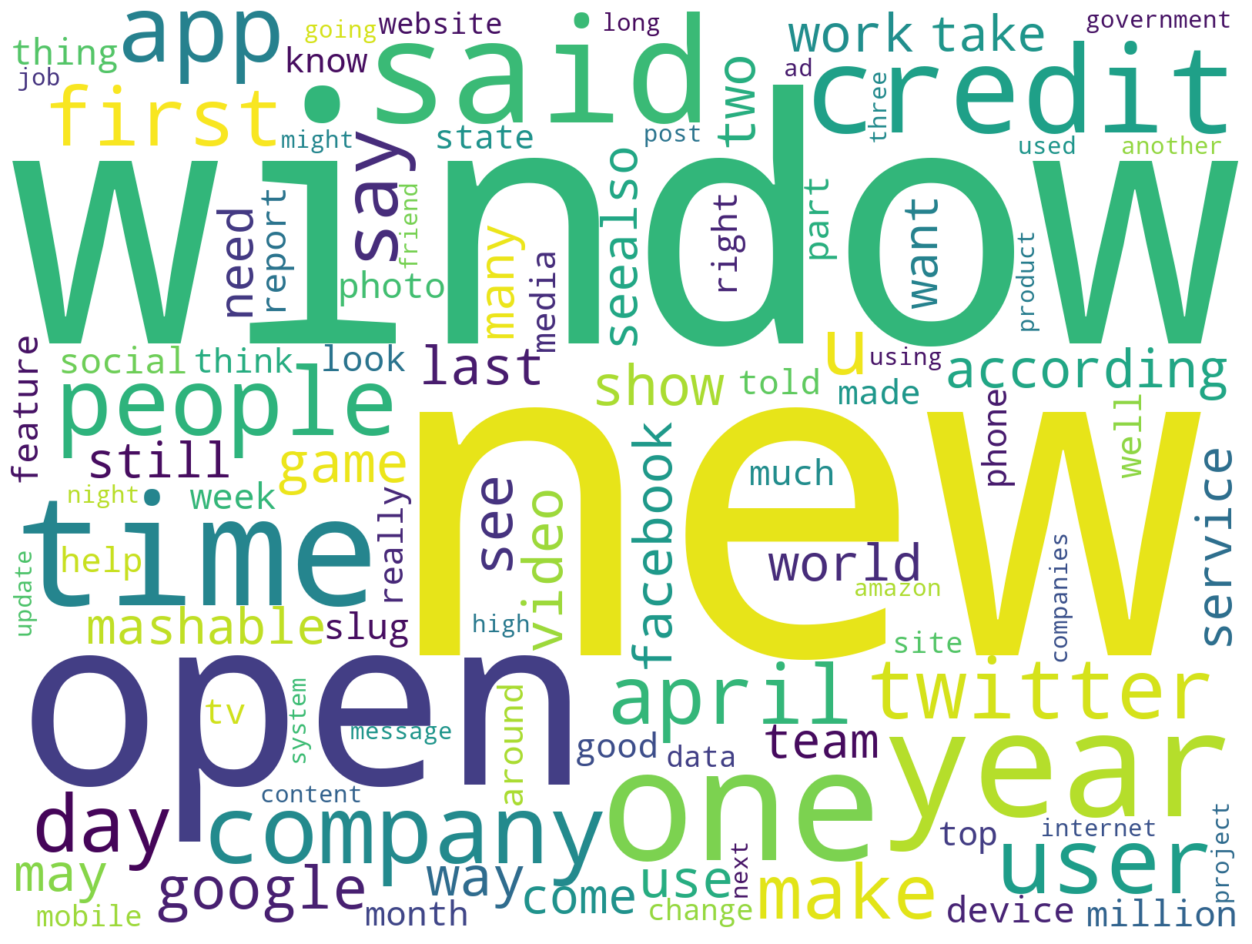

In [28]:
# Making a wordcloud of the text in the article
all_text = " ".join(sent for sent in df['text_prepared'])
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(all_text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [29]:
# Counting Parts of Speech (POS)
from collections import Counter

def pos_counter(x,pos):
    tokens = nltk.word_tokenize(x.lower())
    tokens = [word for word in tokens if word not in STOPWORDS_nlp]
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tags)
    return counts[pos]

In [30]:
df['Noun_Counts'] = df['text_prepared'].apply(lambda x: pos_counter(x,'NN'))
df['Verb_Counts'] = df['text_prepared'].apply(lambda x: (pos_counter(x,'VB')+pos_counter(x,'RB')))
df['Adjective_Counts'] = df['text_prepared'].apply(lambda x: pos_counter(x,'JJ'))

In [31]:
df

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,business,entertainment,lifestyle,misc,social media,tech,text_prepared,Noun_Counts,Verb_Counts,Adjective_Counts
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,1,0,0,0,0,0,reported last week yahoo getting online video ...,38,6,19
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,0,0,0,0,0,1,april fools marks day pranking goes corporate ...,16,4,11
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,0,0,0,0,0,1,world series champion boston red sox visited w...,96,14,57
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,0,0,0,0,0,1,less week apple pledged make emoticons raciall...,52,12,27
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,0,0,0,1,0,0,android users may soon see series new features...,44,10,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6.0,2.0,0.0,4.913978,4,3264.605,...,1,0,0,0,0,0,let cut chase apps lot bells whistles somethin...,16,3,12
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4.0,2.0,0.0,4.674627,6,0.000,...,0,0,0,0,0,1,taylor swift bridal showers made pastels baked...,60,4,18
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3.0,0.0,2.0,4.177665,9,2126.118,...,0,1,0,0,0,0,seen big movies throw big google hangouts amaz...,35,6,12
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7.0,1.0,0.0,4.667961,8,0.000,...,1,0,0,0,0,0,pixar art directors robert kondo dice tsutsumi...,165,21,73


In [32]:
# Creating a CountVectorizer
cv = CountVectorizer(ngram_range=(2,2),max_features=400)
cv_object = cv.fit(df['text_prepared'])

In [33]:
cv3 = CountVectorizer(ngram_range=(3,3),max_features=400)
cv_object3 = cv3.fit(df['text_prepared'])

In [34]:
cv_object3

CountVectorizer(max_features=400, ngram_range=(3, 3))

In [35]:
tf_idf = TfidfVectorizer()

In [36]:
tf_object = tf_idf.fit(df['text_prepared'])

In [37]:
X = cv_object.transform(df['text_prepared'])
print(X.shape)
X.toarray()

(1003, 400)


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
X3 = cv_object3.transform(df['text_prepared'])
print(X3.shape)
X3.toarray()

(1003, 400)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
Xtf = tf_object.transform(df['text_prepared'])
print(Xtf.shape)
Xtf.toarray()

(1003, 23320)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
cv_object.get_feature_names()

C:\Users\ituser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['according company',
 'according new',
 'according report',
 'across country',
 'adario strange',
 'agency coordination',
 'air force',
 'air quality',
 'airlines flight',
 'al jazeera',
 'allows users',
 'along way',
 'amazon fire',
 'android app',
 'app store',
 'apple tv',
 'april credit',
 'april et',
 'april fools',
 'april opens',
 'around world',
 'artist credit',
 'associated press',
 'auto show',
 'available ios',
 'background check',
 'barack obama',
 'big deal',
 'black box',
 'black boxes',
 'blog post',
 'bob al',
 'bosco said',
 'boston globe',
 'boston marathon',
 'boston strong',
 'bros legendary',
 'business school',
 'carbon dioxide',
 'center opened',
 'change password',
 'change passwords',
 'christina ascani',
 'climate change',
 'co founder',
 'colbert report',
 'com opens',
 'comedy central',
 'company announced',
 'company said',
 'copenhagen zoo',
 'course sampling',
 'createelement js',
 'credit card',
 'credit facebook',
 'credit google',
 'credit mashable',

In [41]:
cv_object3.get_feature_names()

['according associated press',
 'according new report',
 'according new york',
 'according wall street',
 'affected patch need',
 'affordable care act',
 'agency coordination centre',
 'air chief marshal',
 'al jazeera america',
 'amazon fire tv',
 'amazon web services',
 'android opens new',
 'announced opens new',
 'anti terrorist operation',
 'app opens new',
 'apple tv roku',
 'april credit michael',
 'april fools day',
 'april indio calif',
 'april opens new',
 'april pacific time',
 'arctic sea ice',
 'associated press opens',
 'australian maritime safety',
 'available ios opens',
 'blog opens new',
 'blog post opens',
 'bloomberg opens new',
 'blurred lines robin',
 'bob al greene',
 'bonus game thrones',
 'bonus grumpy cat',
 'bonus heartbleed bug',
 'bonus stunning sports',
 'borderlands pre sequel',
 'boston marathon bombing',
 'boston marathon bombings',
 'boston red sox',
 'bostonstrong opens new',
 'bros legendary pictures',
 'build developer conference',
 'building observ

In [42]:
tf_object.get_feature_names()

['aa',
 'aaa',
 'aacus',
 'aadmi',
 'aaliyah',
 'aam',
 'aap',
 'aaron',
 'aarp',
 'aasif',
 'aback',
 'abandon',
 'abandoned',
 'abandoning',
 'abbaxkihu',
 'abbey',
 'abbott',
 'abbruzzese',
 'abby',
 'abc',
 'abd',
 'abdomen',
 'abdominal',
 'abdul',
 'abdulla',
 'abdullah',
 'aber',
 'aberdeen',
 'abi',
 'abide',
 'abilites',
 'abilities',
 'ability',
 'abita',
 'abject',
 'able',
 'abliabmfd',
 'abmopwuoj',
 'abnormal',
 'aboard',
 'abode',
 'abounded',
 'abraham',
 'abrasive',
 'abroad',
 'abruptly',
 'abs',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolved',
 'absorb',
 'absorbed',
 'absorbing',
 'abstract',
 'abstracted',
 'absurd',
 'absurdity',
 'absurdly',
 'abu',
 'abuja',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'abusers',
 'abusing',
 'abusive',
 'abuzz',
 'abv',
 'abysmal',
 'abyss',
 'ac',
 'academic',
 'academics',
 'academy',
 'acadia',
 'accelerant',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accelerator',
 '

In [43]:
df_ngram = pd.DataFrame(X.toarray(),columns=cv_object.get_feature_names())
print(df_ngram.shape)
df_ngram.head()

(1003, 400)


,according company,according new,according report,across country,adario strange,agency coordination,air force,air quality,airlines flight,al jazeera,...,year year,years ago,years later,years old,yes yes,yet another,york city,york times,youtube channel,youtube videos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_ngram3 = pd.DataFrame(X3.toarray(),columns=cv_object3.get_feature_names())
print(df_ngram3.shape)
df_ngram3.head()

(1003, 400)


C:\Users\ituser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,according associated press,according new report,according new york,according wall street,affected patch need,affordable care act,agency coordination centre,air chief marshal,al jazeera america,amazon fire tv,...,window year center,wp_scm_comment bonus heartbleed,wrote blog post,xbox one playstation,xfbml fjs parentnode,year boston marathon,year center opened,yes yes yes,york international auto,york times opens
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_ngramtf = pd.DataFrame(Xtf.toarray(),columns=tf_object.get_feature_names())
print(df_ngramtf.shape)
df_ngramtf.head()

C:\Users\ituser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1003, 23320)


,aa,aaa,aacus,aadmi,aaliyah,aam,aap,aaron,aarp,aasif,...,zugara,zuker,zumba,zunzuneo,zusi,zwcrybfe,zwnrtry,zynga,zywbootuh,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df_final = pd.concat([df.reset_index(drop=True),df_ngram.reset_index(drop=True)],axis=1)
df_final.shape

(1003, 432)

In [47]:
df_final3 = pd.concat([df.reset_index(drop=True),df_ngram3.reset_index(drop=True)],axis=1)
df_final3.shape

(1003, 432)

In [48]:
tf_final = pd.concat([df.reset_index(drop=True),df_ngramtf.reset_index(drop=True)],axis=1)
tf_final.shape

(1003, 23352)

In [49]:
df_final

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,year year,years ago,years later,years old,yes yes,yet another,york city,york times,youtube channel,youtube videos
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,0,0,0,0,0,0,0,0,0,1
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,0,0,0,0,0,0,0,0,0,0
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,0,0,0,0,0,0,0,0,0,0
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,0,0,0,0,0,0,0,0,0,0
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6.0,2.0,0.0,4.913978,4,3264.605,...,0,0,0,0,0,0,0,0,0,0
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4.0,2.0,0.0,4.674627,6,0.000,...,0,0,0,0,0,0,0,0,0,0
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3.0,0.0,2.0,4.177665,9,2126.118,...,0,0,0,0,0,0,0,0,0,0
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7.0,1.0,0.0,4.667961,8,0.000,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_final3

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,window year center,wp_scm_comment bonus heartbleed,wrote blog post,xbox one playstation,xfbml fjs parentnode,year boston marathon,year center opened,yes yes yes,york international auto,york times opens
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,0,0,0,0,0,0,0,0,0,0
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,0,0,0,0,0,0,0,0,0,0
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,0,0,0,0,0,0,0,0,0,0
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,0,0,0,0,0,0,0,0,0,0
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6.0,2.0,0.0,4.913978,4,3264.605,...,0,0,0,0,0,0,0,0,0,0
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4.0,2.0,0.0,4.674627,6,0.000,...,0,0,0,0,0,0,0,0,0,0
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3.0,0.0,2.0,4.177665,9,2126.118,...,0,0,0,0,0,0,0,0,0,0
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7.0,1.0,0.0,4.667961,8,0.000,...,0,0,0,0,0,0,0,0,0,0


In [51]:
tf_final

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,zugara,zuker,zumba,zunzuneo,zusi,zwcrybfe,zwnrtry,zynga,zywbootuh,zz
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6.0,2.0,0.0,4.913978,4,3264.605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4.0,2.0,0.0,4.674627,6,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3.0,0.0,2.0,4.177665,9,2126.118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7.0,1.0,0.0,4.667961,8,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_final.to_csv('../Data/preprocessed.csv')

In [53]:
df_final3.to_csv('../Data/preprocessed3.csv')

In [54]:
tf_final.to_csv('../Data/preprocessedtf.csv')